In [1]:
using FurutaPendulums

[ Info: Precompiling FurutaPendulums [8f95568d-7bec-4a61-b2a3-e2d98ddd1432]


In [2]:
using Plots, DelimitedFiles, ControlSystems
include("sim/env.jl")


animate (generic function with 2 methods)

In [2]:
function read_state(furuta,xlast,dt)
    """Read state from pendulum using the last state xlast to compute derivatives"""
    φlast,_,𝜃last,_ = xlast
    φ=read(furuta.base_angle);
    𝜃=read(furuta.arm_angle);
    dφ=(mod2pi(φ-φlast+pi)-pi)/dt
    d𝜃=(mod2pi(𝜃-𝜃last+pi)-pi)/dt
    x = [φ,dφ,𝜃,d𝜃]
end

read_state (generic function with 1 method)

### 1. Real pendulum

In [4]:
furuta = FurutaPendulum()

FurutaPendulum()

In [9]:
function policy(x,t)
    ifelse(t<2,2.5,0.)
end
dt = 0.001
tmax= 10.
ts = 0:dt:tmax
n = length(ts)
x = [read(furuta.base_angle), 0, read(furuta.arm_angle), 0]
xs = zeros(n,4)

last_time=periodic_wait(furuta,0.0,0.0)
for (i,t) in enumerate(ts)
    x = read_state(furuta,x,dt)
    xs[i,:] = x
    u = policy(x,t)
    control(furuta,u)
    last_time=periodic_wait(furuta,last_time,dt)
end

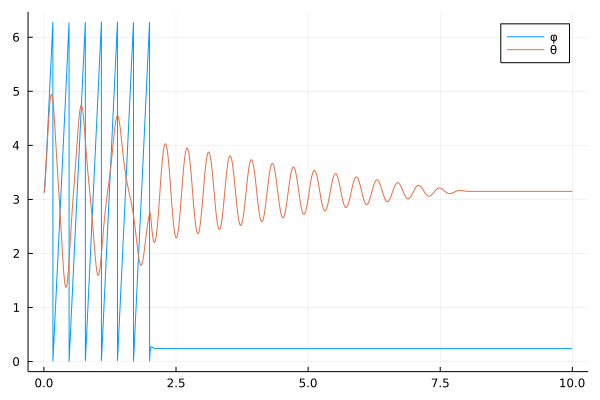

In [10]:
plot(ts,xs[:,1], label="φ")
𝜃s = mod.(xs[:,3].+pi,2*pi)
plot!(ts,𝜃s, label="θ")
# plot(ts,xs, label=["φ" "dφ" "𝜃" "d𝜃"])

### 2. Simulated environment (Furuta Package)

In [11]:
function policy(x,t)
    ifelse(t<2,2.5,0.)
end
furuta = SimulatedFurutaPendulum()
dt = 0.002
tmax= 10.
ts = 0:dt:tmax
n = length(ts)
x = furuta.x
xs = zeros(n,4)

last_time=periodic_wait(furuta,0.0,0.0)
for (i,t) in enumerate(ts)
    x = furuta.x
    xs[i,:] = x
    u = policy(x,t)
    control(furuta,u)
    last_time=periodic_wait(furuta,last_time,dt)
end

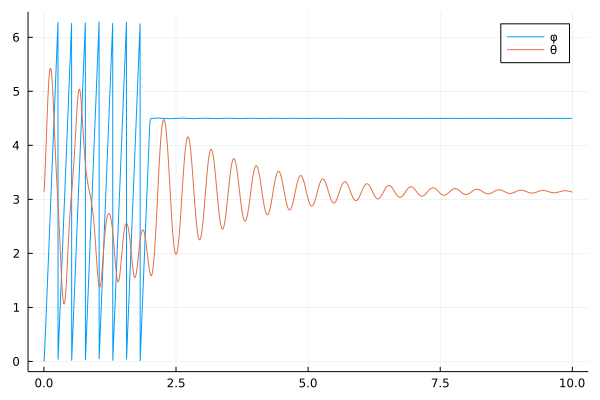

In [12]:
plot(ts,xs[:,1], label="φ")
𝜃s = xs[:,3]
plot!(ts,𝜃s, label="θ")
# plot(ts,xs, label=["φ" "dφ" "𝜃" "d𝜃"])

### 3. Simulated environment (Custom)

In [35]:
include("sim/env.jl")
function policy(x,t)
    ifelse(t<2,2.5,0.)
end

x0 = [0, 0, π, 0]
u0 = 0.0
dt = 0.002
tmax= 10.
ts = 0:dt:tmax
n = length(ts)
integrator = init_sim(x0,u0;tmax=10.,dt=dt)
x = x0
u = u0
xs = zeros(n,4)
ts = zeros(n)
j=0
for (i,(x,t)) in enumerate(tuples(integrator))
    j+=1
    xs[i,:] = x
    ts[i] = t
    u = policy(x,t)
    x₊ = sim!(integrator,u) # go to next timestep
end
# ts = 0:dt:tmax

In [37]:
n, j

(5001, 2521)

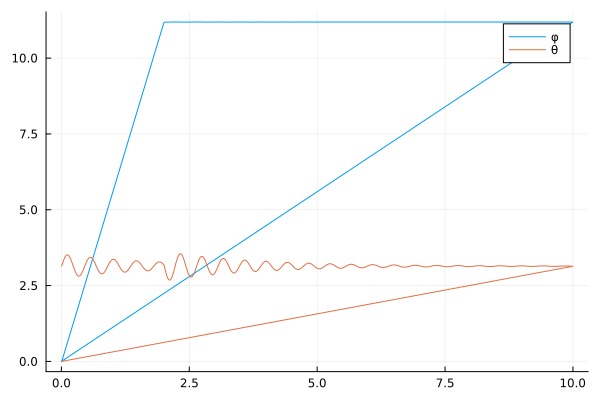

In [32]:
plot(ts,xs[:,1], label="φ")
𝜃s = xs[:,3]
plot!(ts,𝜃s, label="θ")

In [27]:
ts[4900:end]

102-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

┌ Info: Saved animation to 
│   fn = /home/jupyter/group-2/src/anim_pendulum.gif
└ @ Plots /home/jupyter/.julia/packages/Plots/FCM0H/src/animation.jl:114


Plots.AnimatedGif("/home/jupyter/group-2/src/anim_pendulum.gif")
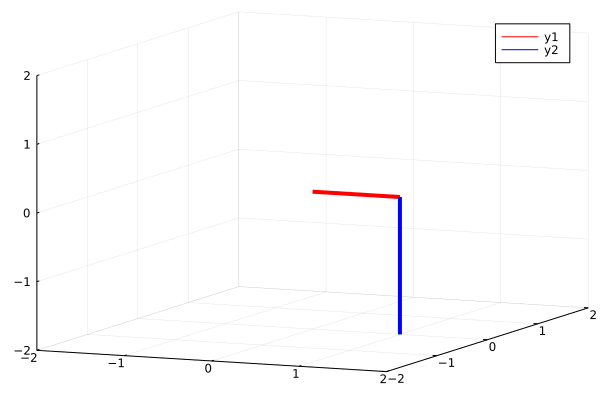

In [100]:
animate(integrator)